In [1]:
%%capture capt
# we need to install a library to read a PDF file. this would be better
# placed in an environment script that is run on Notebook startup.
!pip install tika

In [2]:
import sys
import os
import re
import tika
from tika import parser
from string import punctuation

pdfText = ''
folder = 'Files'
filelist = [fileName for fileName in os.listdir(folder) if fileName.endswith(".pdf")]
for fileName in filelist:
    filePath = os.path.join(folder, fileName)
    parsePDF = parser.from_file(filePath)
    pdfText = parsePDF['content']
   
# strip out URLs starting with http and www and ending with a space. use https://regexr.com to test expressions
pdfText = re.sub(r'%20','', pdfText)
pdfText = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', ' ', pdfText, flags=re.MULTILINE)

# convert to lower case, remove punctuation and digits
pdfText = ''.join(c for c in pdfText if c not in punctuation)
pdfText = ''.join(c for c in pdfText if not c.isdigit())

# we need to avoid joining two words together so we replace \n with space then remove duplicate spaces
pdfText = pdfText.replace('\n', ' ')
pdfText = re.sub(' +', ' ', pdfText).strip()
print (pdfText)

2019-11-26 08:27:29,287 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2019-11-26 08:27:34,300 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


PRODUCED BY The Digital Skills Gap How the lack of skills is affecting business transformation efforts THE DIGITAL SKILLS GAP Introduction Mind the gap How a lack of skills is affecting your digital transformation journey Where are the shortfalls When old meets new – battling icy waters The Brexit balancing act Hiring headaches Finding the right crew to steer your ship To offshore or not to offshore That is the question The right environment How to attract top tier talent Training talent from the start Conclusion Acknowledgements Contents THE DIGITAL SKILLS GAP Introduction Sir Ernest Henry Shackleton was a British polar explorer famed for his TransAntarctica endurance expedition in the early s The story of his incredible journey is one of leadership when disaster strikes over and over again Ahead of his voyage a newspaper advertisement that is widely believed to have been written by Shackleton was published calling for men to accompany him It read “MEN WANTED FOR HAZARDOUS JOURNEY SMA

In [3]:
%%capture capt
#install NLTK, the leading Python platform for working with language data
!pip install nltk

In [4]:
# Named Entity Recognition (NER) is a three step process in NLTK, Tokenization, Parts of Speech (POS) 
# tagging and NER itself.  NER classified named entities such as persons, organisations, locations, times, 
# quantities etc.
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

# get a set of common stopwords from NLTK and remove they from out body of text
nltk.download("stopwords")
from nltk.corpus import stopwords
words = set(stopwords.words('english'))
pdfText = ' '.join([word for word in pdfText.split() if word not in words])
  
# POS tagging
def fn_preprocess(text):
    text = nltk.word_tokenize(text)
    text = nltk.pos_tag(text)
    return text

print(fn_preprocess(pdfText))

[nltk_data] Downloading package words to /home/jovyan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('PRODUCED', 'VBN'), ('BY', 'IN'), ('The', 'DT'), ('Digital', 'NNP'), ('Skills', 'NNP'), ('Gap', 'NNP'), ('How', 'NNP'), ('lack', 'NN'), ('skills', 'VBZ'), ('affecting', 'VBG'), ('business', 'NN'), ('transformation', 'NN'), ('efforts', 'NNS'), ('THE', 'NNP'), ('DIGITAL', 'NNP'), ('SKILLS', 'NNP'), ('GAP', 'NNP'), ('Introduction', 'NNP'), ('Mind', 'NNP'), ('gap', 'NN'), ('How', 'NNP'), ('lack', 'NN'), ('skills', 'VBZ'), ('affecting', 'VBG'), ('digital', 'JJ'), ('transformation', 'NN'), ('journey', 'NN'), ('Where', 'NNP'), ('shortfalls', 'VBZ'), ('When', 'WRB'), ('old', 'JJ'), ('meets', 'NNS'), ('new', 'JJ'), ('–', 'NNP'), ('battling', 'NN'), ('icy', 'NN'), ('waters', 'VBZ'), ('The', 'DT'), ('Brexit', 'NNP'), ('balancing', 'NN'), ('act', 'NN'), ('Hiring', 'NNP'), ('headaches', 'NNS'), ('Finding', 'VBG'), ('right', 'JJ'), ('crew', 'NN'), ('steer', 'VB'), ('ship', 'NN'), ('To', 'TO'), ('offshore', 'VB'), ('offshore', 'RP'), ('That', 'DT'), ('question', 'NN'), ('The', 'DT'), ('right', 'NN'

In [5]:
%%capture capt
#install SpaCy, a highly performant text extraction library.
!pip install spacy
!python -m spacy download en_core_web_sm

In [6]:
# lets show the data classified as persons
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(str(pdfText))

# use the inbuilt visualisation capability to highlight the classifications
displacy.render(doc, style="ent", jupyter=True)

In [7]:
# extract the persons and compare with the original document
for element in doc.ents:
    if (element.label_ == "PERSON"):
        print('Type: %s, Value: %s' % (element.label_, element.text))   

Type: PERSON, Value: Brexit
Type: PERSON, Value: Ernest Henry
Type: PERSON, Value: Beth Rowland
Type: PERSON, Value: Tom Collins
Type: PERSON, Value: Scott Hanchett
Type: PERSON, Value: Hanchett Companies
Type: PERSON, Value: Funding Circle
Type: PERSON, Value: Dontas
Type: PERSON, Value: Vanson Bourne
Type: PERSON, Value: Dontas
Type: PERSON, Value: Edwards
Type: PERSON, Value: Collins
Type: PERSON, Value: Korn Ferry
Type: PERSON, Value: Nico Dontas
Type: PERSON, Value: JohnPaul Edwards
Type: PERSON, Value: Scott Hanchett
Type: PERSON, Value: Rowland
Type: PERSON, Value: Hanchett
Type: PERSON, Value: Tom Collins
Type: PERSON, Value: Good Energy
Type: PERSON, Value: Edwards
Type: PERSON, Value: Edwards
Type: PERSON, Value: Good Energy
Type: PERSON, Value: Tom Collins
Type: PERSON, Value: Beth Rowland Global
Type: PERSON, Value: JohnPaul
Type: PERSON, Value: Rick Farrow Head
Type: PERSON, Value: Abby Ewen
Type: PERSON, Value: Chawla Head
Type: PERSON, Value: Cornerstone OnDemand Les Ker

In [8]:
# extract the organisations, note how the results are the best guess based on the model we used
for element in doc.ents:
    if (element.label_ == "ORG"):
        print('Type: %s, Value: %s' % (element.label_, element.text)) 

Type: ORG, Value: DIGITAL
Type: ORG, Value: TransAntarctica
Type: ORG, Value: DIGITAL
Type: ORG, Value: Keen
Type: ORG, Value: eBook
Type: ORG, Value: DIGITAL
Type: ORG, Value: Roald Amundsen
Type: ORG, Value: TransAntarctic Expedition
Type: ORG, Value: JohnPaul Edwards
Type: ORG, Value: Foresters Financial
Type: ORG, Value: BAE Systems
Type: ORG, Value: Rowland
Type: ORG, Value: Rick Farrow CTO Nuclear Decommissioning Authority
Type: ORG, Value: deloitte
Type: ORG, Value: CIO British
Type: ORG, Value: JohnPaul Edwards
Type: ORG, Value: Foresters Financial
Type: ORG, Value: DIGITAL
Type: ORG, Value: DIGITAL
Type: ORG, Value: Hanchett
Type: ORG, Value: DIGITAL
Type: ORG, Value: THE BrExiT BAlAncing AcT
Type: ORG, Value: European Union EU
Type: ORG, Value: knockon
Type: ORG, Value: CIO British
Type: ORG, Value: Brexit
Type: ORG, Value: DIGITAL
Type: ORG, Value: CIO
Type: ORG, Value: DIGITAL
Type: ORG, Value: Clevel
Type: ORG, Value: Rowland Nailing
Type: ORG, Value: CIO
Type: ORG, Value:

In [10]:
%%capture capt
# lets try a large language model on names and organisations. This will take a little longer to download.
!python -m spacy download en_core_web_md

In [11]:
# lets show the data classified using a large language model. Note the difference in loading the model. We have
# to use import and call .load() on it.  The spacy.load() method used previously did not work.  The results are 
# better.
import spacy
import en_core_web_md

nlp = en_core_web_md.load()
doc = nlp(str(pdfText))

for element in doc.ents:
    if (element.label_ == "PERSON"):
        print('Type: %s, Value: %s' % (element.label_, element.text))  
        
for element in doc.ents:
    if (element.label_ == "ORG"):
        print('Type: %s, Value: %s' % (element.label_, element.text)) 

Type: PERSON, Value: Shackleton
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Keep
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Gartner
Type: PERSON, Value: Beth Rowland
Type: PERSON, Value: Tom Collins
Type: PERSON, Value: Rick Farrow CTO Nuclear Decommissioning Authority
Type: PERSON, Value: Farrow
Type: PERSON, Value: Scott Hanchett
Type: PERSON, Value: Ricardo
Type: PERSON, Value: Nico Dontas
Type: PERSON, Value: JohnPaul Edwards
Type: PERSON, Value: Vanson Bourne SnapLogic
Type: PERSON, Value: Dontas
Type: PERSON, Value: Hanchett
Type: PERSON, Value: Collins
Type: PERSON, Value: Nico Dontas
Type: PERSON, Value: Scott Hanchett
Type: PERSON, Value: Ricardo Our HR
Type: PERSON, Value: Rowland
Type: PERSON, Value: Shackleton
Type: PERSON, Value: Hanchett
Type: PERSON, Value: Tom Collins
Type: PERSON, Value: Edwards
Type: PERSON, Value: Edwards
Type: PERSON, Value: Farrow
Type

                Frequency
Term                     
digital                80
skills                 55
head                   42
business               38
technology             27
people                 26
gap                    24
talent                 24
right                  20
director               20
transformation         16
shackleton             15
businesses             14
group                  13
chief                  13
work                   13
working                12
officer                11
experience             11
cio                    11
new                    10
teams                  10
recruitment            10
systems                10
says                   10


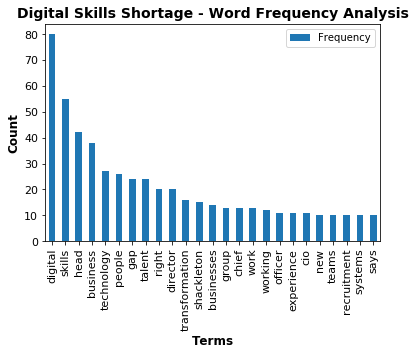

In [13]:
# Frequency analysis using NLTK. Note that we still have some punctuation in the text so we'll deal with that as well
# and remove any stopwords.  We already downloaded the stopwords earlier so we don't need to do that again
import pandas as pd
import matplotlib.pyplot as plt
import nltk.corpus as cp
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist  
from nltk.corpus import stopwords

# frequency distribution of words
words = word_tokenize(pdfText)
swords = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in swords]
f = FreqDist(words)

# use pandas to format a better output
df = pd.DataFrame.from_dict(f, orient='index')
df.columns = ['Frequency']
df.index.name = 'Term'
table = df.sort_values('Frequency',ascending=False)
print(table.head(25))

# lets display a barchart for this using matplotlib. we have to reduce the data to process the top few rows
# otherwise the chart will not be readable
df = table.iloc[0:25]
ax = df.plot(kind='bar', fontsize=11)
ax.set_title("Digital Skills Shortage - Word Frequency Analysis", weight='bold', fontsize=14)
ax.set_xlabel('Terms', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
plt.show()